In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, mpl_loc, fancy_legend, markers, load_mpl_presets
import numpy as np
import math as m
import vice
import sys
sys.path.append("..")
import src
load_mpl_presets()
print(sys.version_info)

/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


In [2]:
path = "/Volumes/Elements/bimodality-outputs/earlyburst/post-process"
names = [
    "%s/control" % (path),
    "%s/test" % (path),
    "%s/test_2" % (path),
    "%s/test_5" % (path)
]
outputs = [vice.output(_) for _ in names]
for out in outputs:
    extra = np.genfromtxt("%s_analogdata.out" % (out.name))
    out.stars["abszfinal"] = [abs(row[-1]) for row in extra[:out.stars.size[0]]]

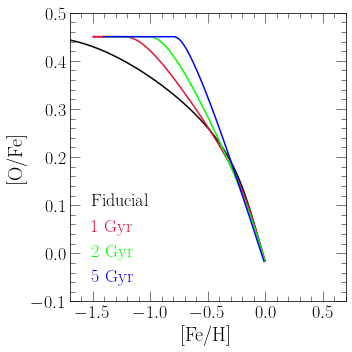

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("[O/Fe]")
ax.set_xlim([-1.7, 0.7])
ax.set_ylim([-0.1, 0.5])

colors = ["black", "crimson", "lime", "blue"]
# zones = ["zone40", "zone80", "zone120"]
zones = ["zone80"]
labels = ["Fiducial", "1 Gyr", "2 Gyr", "5 Gyr"]

for i in range(len(outputs)):
    for j in range(len(zones)):
        kwargs = {
            "c": named_colors()[colors[i]]
        }
        if not j: kwargs["label"] = labels[i]
        xvals = outputs[i].zones[zones[j]].history["[fe/h]"]
        yvals = outputs[i].zones[zones[j]].history["[o/fe]"]
        ax.plot(xvals, yvals, **kwargs)
        
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 1,
    "frameon": False,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

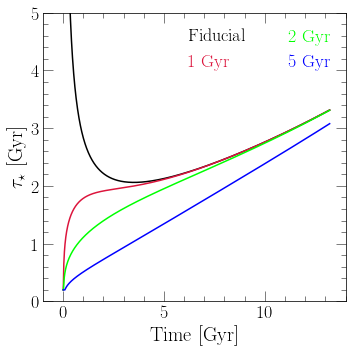

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time [Gyr]")
ax.set_ylabel(r"$\tau_\star$ [Gyr]")
ax.set_xlim([-1, 14])
ax.set_ylim([0, 5])

zone = "zone80"
colors = ["black", "crimson", "lime", "blue"]
labels = ["Fiducial", "1 Gyr", "2 Gyr", "5 Gyr"]

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": labels[i]
    }
    xvals = outputs[i].zones[zone].history["time"]
    yvals = [1.e-9 * a / b if b else float("inf") for a, b in zip(
        outputs[i].zones[zone].history["mgas"], outputs[i].zones[zone].history["sfr"])]
    ax.plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 2,
    "frameon": False,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

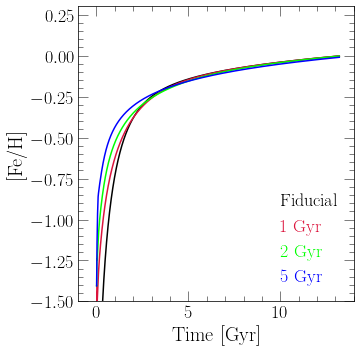

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time [Gyr]")
# ax.set_ylabel("[O/Fe]")
ax.set_ylabel("[Fe/H]")
ax.set_xlim([-1, 14])
# ax.set_ylim([-0.1, 0.5])
ax.set_ylim([-1.5, 0.3])

zone = "zone80"
colors = ["black", "crimson", "lime", "blue"]
labels = ["Fiducial", "1 Gyr", "2 Gyr", "5 Gyr"]

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": labels[i]
    }
    xvals = outputs[i].zones[zone].history["time"]
#     yvals = outputs[i].zones[zone].history["[o/fe]"]
    yvals = outputs[i].zones[zone].history["[fe/h]"]
    ax.plot(xvals, yvals, **kwargs)
    
kwargs = {
#     "loc": mpl_loc("upper right"),
    "loc": mpl_loc("lower right"),
    "ncol": 1,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_36038/1261073903.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


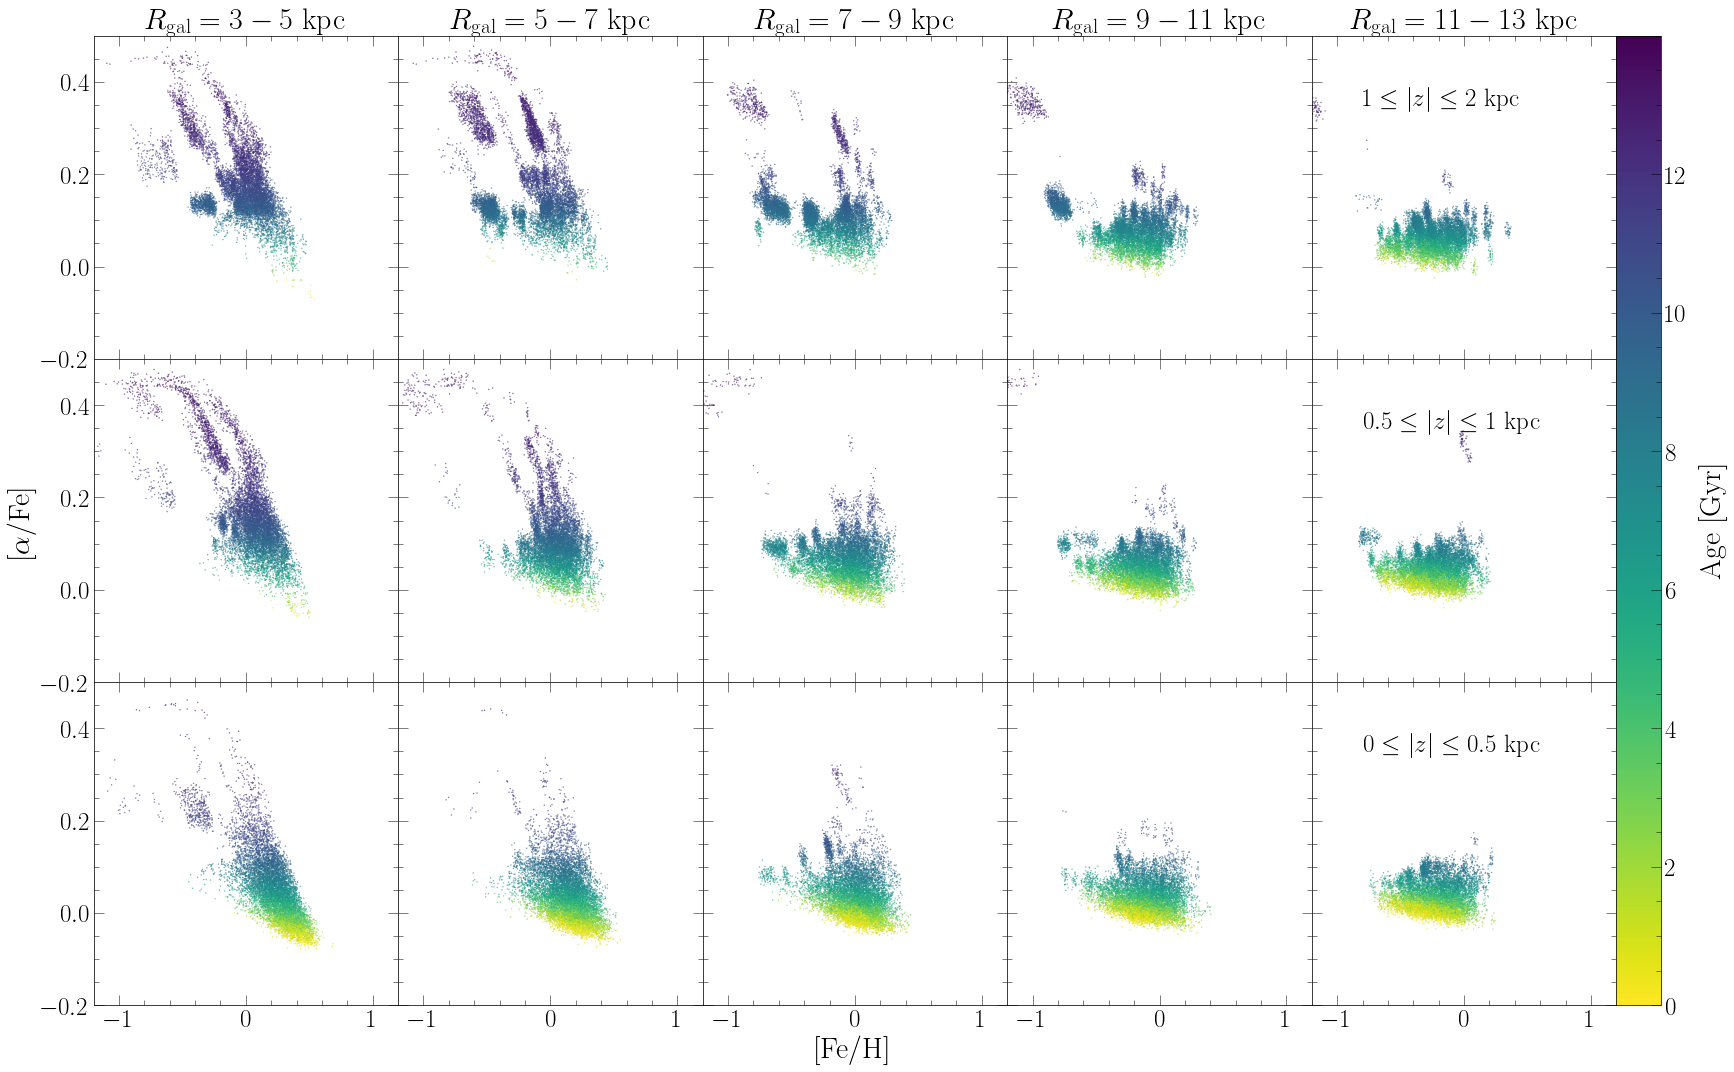

In [13]:
radbins = [[3, 5], [5, 7], [7, 9], [9, 11], [11, 13]]
zbins = [[1, 2], [0.5, 1], [0, 0.5]]
zonewidth = 0.1
output = outputs[-1]

fig, axes = plt.subplots(ncols = 5, nrows = 3, figsize = (25, 15))
axes[1][0].set_ylabel(r"[$\alpha$/Fe]", fontsize = 30)
axes[2][2].set_xlabel("[Fe/H]", fontsize = 30)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        if j: plt.setp(axes[i][j].get_yticklabels(), visible = False)
        axes[i][j].set_xlim([-1.2, 1.2])
        axes[i][j].set_ylim([-0.2, 0.5])
        axes[i][j].tick_params(which = "both", labelsize = 25)
        if not i: axes[i][j].set_title(
            r"$R_\text{gal} = %g - %g$ kpc" % (radbins[j][0], radbins[j][1]), fontsize = 30)
        if j == len(axes[i]) - 1: axes[i][j].text(-0.8, 0.35, r"$%g \leq \left|z\right| \leq %g$ kpc" % (
            zbins[i][0], zbins[i][1]), fontsize = 25)

for i in range(len(zbins)):
    for j in range(len(radbins)):
# for i in range(1):
#     for j in range(1):
        stars = output.stars.filter(
            "zone_final", ">=", radbins[j][0] // zonewidth).filter(
            "zone_final", "<=", radbins[j][1] // zonewidth).filter(
            "abszfinal", ">=", zbins[i][0]).filter(
            "abszfinal", "<=", zbins[i][1])
        np.random.seed(seed = 0)
        mtot = sum(stars["mass"])
        mass_fracs = [_ / mtot for _ in stars["mass"]]
        indeces = np.random.choice(list(range(len(stars["mass"]))), p = mass_fracs, size = 10000)
        xvals = [stars["[fe/h]"][_] for _ in indeces]
        yvals = [stars["[o/fe]"][_] for _ in indeces]
        age = [stars["age"][_] for _ in indeces]
        for k in range(len(xvals)):
            xvals[k] += np.random.normal(scale = 0.01)
            yvals[k] += np.random.normal(scale = 0.01)
        kwargs = {
            "c": age,
            "s": 0.1,
            "rasterized": True,
            "cmap": plt.get_cmap("viridis_r"),
            "vmin": 0,
            "vmax": 14
        }
        sc = axes[i][j].scatter(xvals, yvals, **kwargs)
        
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0, orientation = "vertical")
cbar.set_label("Age [Gyr]", labelpad = 10, fontsize = 30)
cbar.set_ticks(range(0, 14, 2))
cbar.ax.tick_params(labelsize = 25)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0, right = 0.9)
cbar_ax.set_position([
    axes[-1][-1].get_position().x1,
    axes[-1][-1].get_position().y0,
    0.025,
    axes[0][-1].get_position().y1 - axes[-1][-1].get_position().y0
])
# for ext in ["pdf", "png"]: plt.savefig("./ofe_feh_densitymap/ratiotest.%s" % (ext))
plt.show()

In [29]:
path = "/Volumes/Elements/bimodality-outputs/earlyburst/post-process"
name = "%s/tau1_0p2_tau2_6_onset_1" % (path)
out = vice.output(name)
extra = np.genfromtxt("%s_analogdata.out" % (out.name))
out.stars["abszfinal"] = [abs(row[-1]) for row in extra[:out.stars.size[0]]]

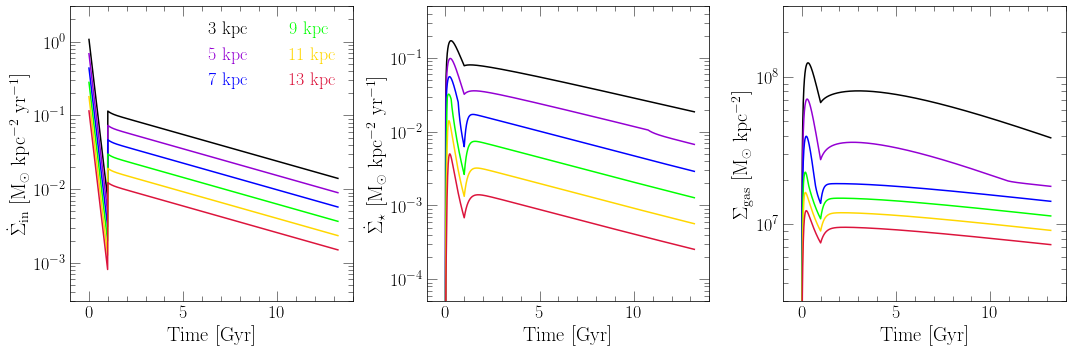

In [32]:
fig = plt.figure(figsize = (15, 5))
axes = []
ylabels = [
    r"$\dot{\Sigma}_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\Sigma_\text{gas}$ [M$_\odot$ kpc$^{-2}$]"
]
ylim = [[3.e-4, 3], [5.e-5, 5.e-1], [3.e6, 3.e8]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlabel("Time [Gyr]")
    axes[i].set_ylabel(ylabels[i])
    axes[i].set_yscale("log")
    axes[i].set_ylim(ylim[i])
    axes[i].set_xlim([-1, 14])
    
zonewidth = 0.1
radii = [3, 5, 7, 9, 11, 13]
zones = ["zone%d" % (int(_ / zonewidth)) for _ in radii]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]

for i in range(len(zones)):
    area = m.pi * ((radii[i] + zonewidth)**2 - radii[i]**2)
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d kpc" % (radii[i])
    }
    xvals = out.zones[zones[i]].history["time"]
    yvals = out.zones[zones[i]].history["ifr"]
    yvals = [_ / area for _ in yvals]
    axes[0].plot(xvals, yvals, **kwargs)
    yvals = out.zones[zones[i]].history["sfr"]
    yvals = [_ / area for _ in yvals]
    axes[1].plot(xvals, yvals, **kwargs)
    yvals = out.zones[zones[i]].history["mgas"]
    yvals = [_ / area for _ in yvals]
    axes[2].plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 2,
    "handlelength": 0
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)
    
plt.tight_layout()
for ext in ["pdf", "png"]: plt.savefig("./earlyburst/initial_evol.%s" % (ext))
plt.show()

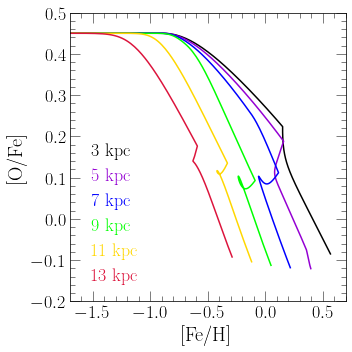

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("[O/Fe]")
ax.set_xlim([-1.7, 0.7])
ax.set_ylim([-0.2, 0.5])

radii = [3, 5, 7, 9, 11, 13]
zones = ["zone%d" % (10 * _) for _ in radii]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]

for i in range(len(zones)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d kpc" % (radii[i])
    }
    xvals = out.zones[zones[i]].history["[fe/h]"]
    yvals = out.zones[zones[i]].history["[o/fe]"]
    ax.plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 1,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
for ext in ["pdf", "png"]: plt.savefig("./earlyburst/initial_tracks.%s" % (ext))
plt.show()

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_7182/3903375048.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


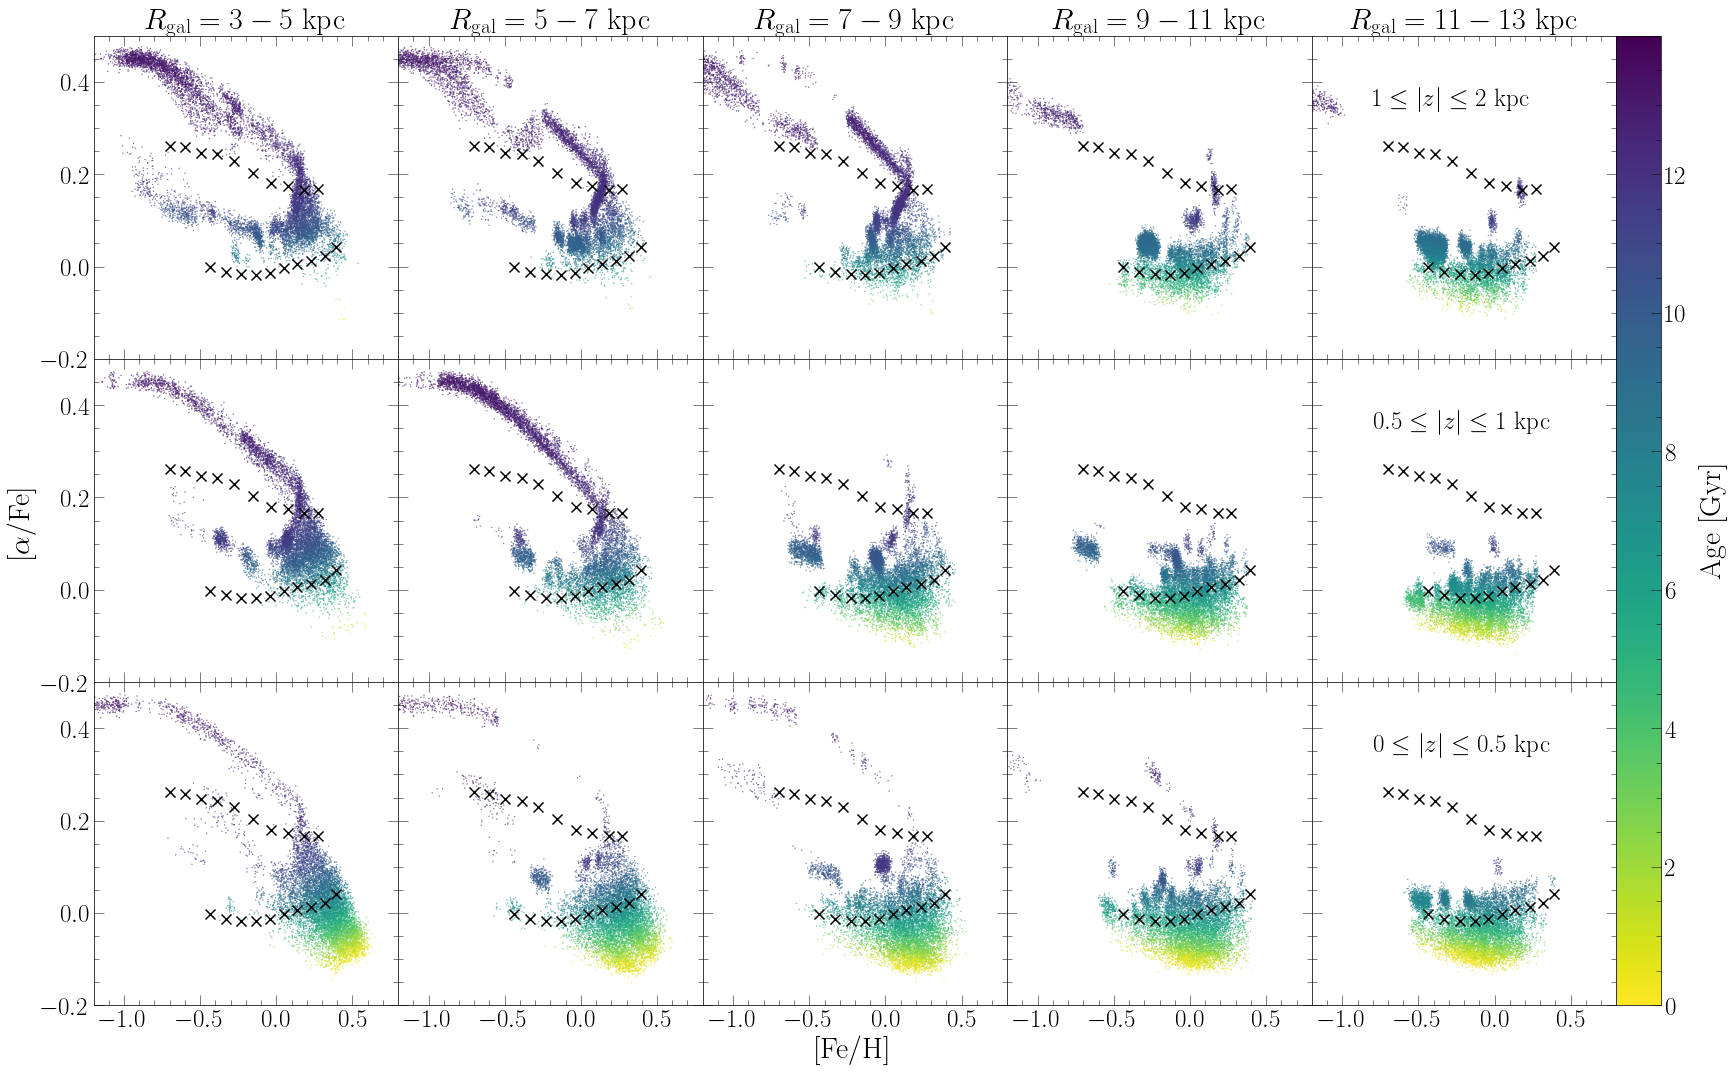

In [15]:
radbins = [[3, 5], [5, 7], [7, 9], [9, 11], [11, 13]]
zbins = [[1, 2], [0.5, 1], [0, 0.5]]
zonewidth = 0.1

fig, axes = plt.subplots(ncols = 5, nrows = 3, figsize = (25, 15))
axes[1][0].set_ylabel(r"[$\alpha$/Fe]", fontsize = 30)
axes[2][2].set_xlabel("[Fe/H]", fontsize = 30)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        if j: plt.setp(axes[i][j].get_yticklabels(), visible = False)
        axes[i][j].set_xlim([-1.2, 0.8])
        axes[i][j].set_ylim([-0.2, 0.5])
        axes[i][j].tick_params(which = "both", labelsize = 25)
        if not i: axes[i][j].set_title(
            r"$R_\text{gal} = %g - %g$ kpc" % (radbins[j][0], radbins[j][1]), fontsize = 30)
        if j == len(axes[i]) - 1: axes[i][j].text(-0.8, 0.35, r"$%g \leq \left|z\right| \leq %g$ kpc" % (
            zbins[i][0], zbins[i][1]), fontsize = 25)

for i in range(len(zbins)):
    for j in range(len(radbins)):
# for i in range(1):
#     for j in range(1):
        stars = out.stars.filter(
            "zone_final", ">=", radbins[j][0] // zonewidth).filter(
            "zone_final", "<=", radbins[j][1] // zonewidth).filter(
            "abszfinal", ">=", zbins[i][0]).filter(
            "abszfinal", "<=", zbins[i][1])
        np.random.seed(seed = 0)
        mtot = sum(stars["mass"])
        mass_fracs = [_ / mtot for _ in stars["mass"]]
        indeces = np.random.choice(list(range(len(stars["mass"]))), p = mass_fracs, size = 10000)
        xvals = [stars["[fe/h]"][_] for _ in indeces]
        yvals = [stars["[o/fe]"][_] for _ in indeces]
        age = [stars["age"][_] for _ in indeces]
        birth = [zonewidth * (stars["zone_origin"][_] + 0.5) for _ in indeces]
        for k in range(len(xvals)):
            xvals[k] += np.random.normal(scale = 0.01)
            yvals[k] += np.random.normal(scale = 0.01)
        kwargs = {
            "c": age,
#             "c": birth,
            "s": 0.1,
            "rasterized": True,
            "cmap": plt.get_cmap("viridis_r"),
            "vmin": 0,
            "vmax": 14
#             "vmax": 15.5
        }
        sc = axes[i][j].scatter(xvals, yvals, **kwargs)
        
higha, lowa = src.data.griffith2021()
kwargs = {
    "c": named_colors()["black"],
    "marker": markers()['x'],
    "zorder": 10,
    "s": 100
}
for i in range(len(zbins)):
    for j in range(len(radbins)):
        axes[i][j].scatter(higha["[fe/h]"], higha["[mg/fe]"], **kwargs)
        axes[i][j].scatter(lowa["[fe/h]"], lowa["[mg/fe]"], **kwargs)
        
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0, orientation = "vertical")
cbar.set_label("Age [Gyr]", labelpad = 10, fontsize = 30)
# cbar.set_label(r"$R_\text{gal}$ of birth [kpc]", labelpad = 10, fontsize = 30)
cbar.set_ticks(range(0, 14, 2))
# cbar.set_ticks(range(0, 16, 2))
cbar.ax.tick_params(labelsize = 25)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0, right = 0.9)
cbar_ax.set_position([
    axes[-1][-1].get_position().x1,
    axes[-1][-1].get_position().y0,
    0.025,
    axes[0][-1].get_position().y1 - axes[-1][-1].get_position().y0
])
# for ext in ["pdf", "png"]: plt.savefig("./ofe_feh_densitymap/earlyburst_initial_age.%s" % (ext))
plt.show()

In [22]:
path = "/Volumes/Elements/bimodality-outputs/earlyburst/post-process"
name = "%s/single_test" % (path)
out = vice.output(name)
extra = np.genfromtxt("%s_analogdata.out" % (out.name))
out.stars["abszfinal"] = [abs(row[-1]) for row in extra[:out.stars.size[0]]]

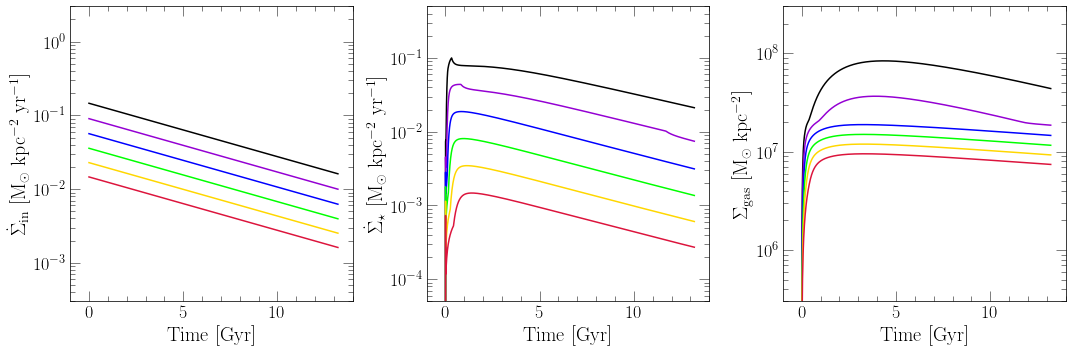

In [25]:
fig = plt.figure(figsize = (15, 5))
axes = []
ylabels = [
    r"$\dot{\Sigma}_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\Sigma_\text{gas}$ [M$_\odot$ kpc$^{-2}$]"
]
ylim = [[3.e-4, 3], [5.e-5, 5.e-1], [3.e5, 3.e8]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlabel("Time [Gyr]")
    axes[i].set_ylabel(ylabels[i])
    axes[i].set_yscale("log")
    axes[i].set_ylim(ylim[i])
    axes[i].set_xlim([-1, 14])
    
zonewidth = 0.1
radii = [3, 5, 7, 9, 11, 13]
zones = ["zone%d" % (int(_ / zonewidth)) for _ in radii]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]

for i in range(len(zones)):
    area = m.pi * ((radii[i] + zonewidth)**2 - radii[i]**2)
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d kpc" % (radii[i])
    }
    xvals = out.zones[zones[i]].history["time"]
    yvals = out.zones[zones[i]].history["ifr"]
    yvals = [_ / area for _ in yvals]
    axes[0].plot(xvals, yvals, **kwargs)
    yvals = out.zones[zones[i]].history["sfr"]
    yvals = [_ / area for _ in yvals]
    axes[1].plot(xvals, yvals, **kwargs)
    yvals = out.zones[zones[i]].history["mgas"]
    yvals = [_ / area for _ in yvals]
    axes[2].plot(xvals, yvals, **kwargs)
    
    
plt.tight_layout()
plt.show()

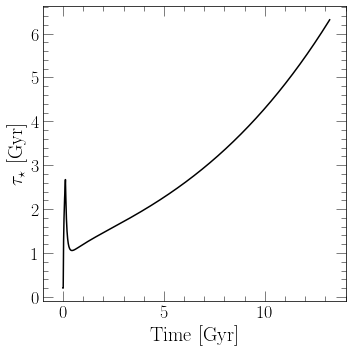

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time [Gyr]")
ax.set_ylabel(r"$\tau_\star$ [Gyr]")
ax.set_xlim([-1, 14])

xvals = out.zones["zone80"].history["time"]
yvals = [1.e-9 * a / b for a, b in zip(
    out.zones["zone80"].history["mgas"],
    out.zones["zone80"].history["sfr"])]
ax.plot(xvals, yvals, c = named_colors()["black"])

plt.tight_layout()
plt.show()

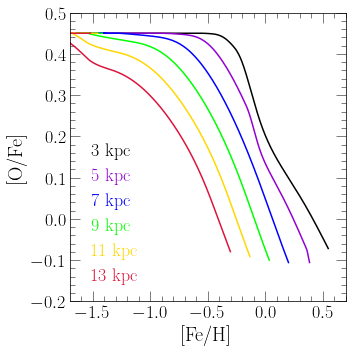

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("[O/Fe]")
ax.set_xlim([-1.7, 0.7])
ax.set_ylim([-0.2, 0.5])

radii = [3, 5, 7, 9, 11, 13]
zones = ["zone%d" % (10 * _) for _ in radii]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]

for i in range(len(zones)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d kpc" % (radii[i])
    }
    xvals = out.zones[zones[i]].history["[fe/h]"]
    yvals = out.zones[zones[i]].history["[o/fe]"]
    ax.plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 1,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_7182/1169898481.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


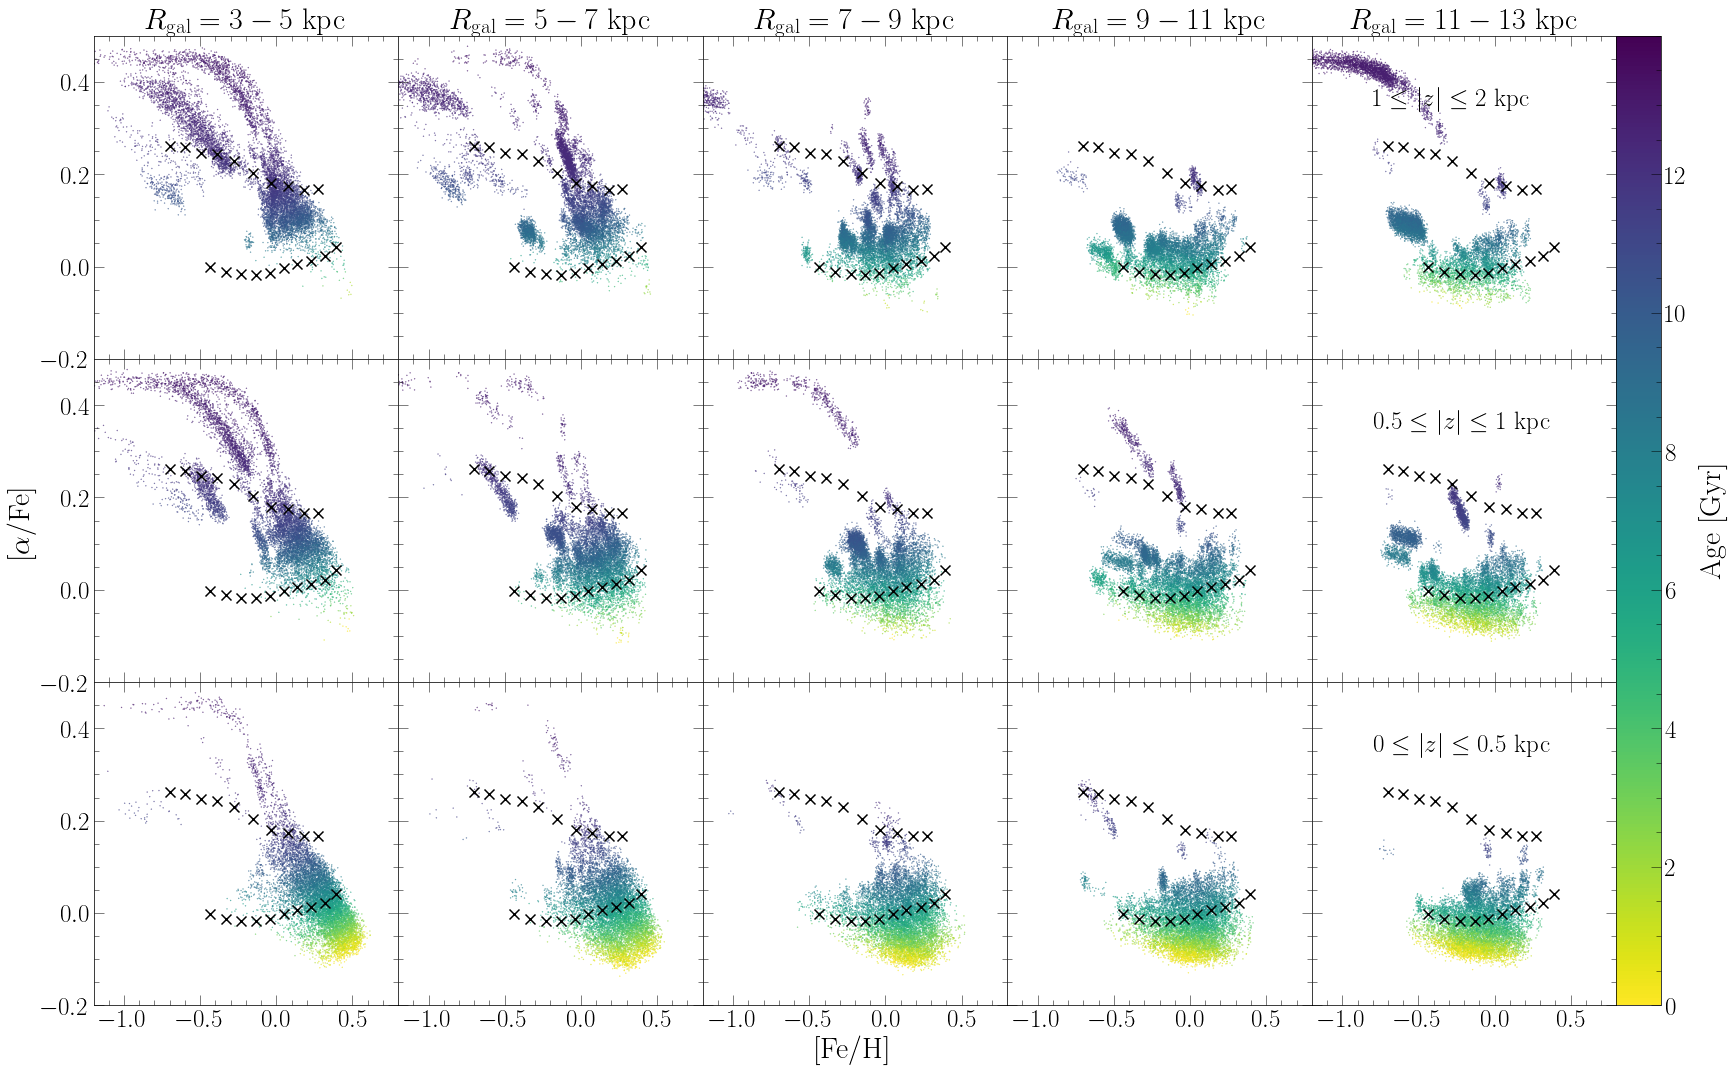

In [28]:
radbins = [[3, 5], [5, 7], [7, 9], [9, 11], [11, 13]]
zbins = [[1, 2], [0.5, 1], [0, 0.5]]
zonewidth = 0.1

fig, axes = plt.subplots(ncols = 5, nrows = 3, figsize = (25, 15))
axes[1][0].set_ylabel(r"[$\alpha$/Fe]", fontsize = 30)
axes[2][2].set_xlabel("[Fe/H]", fontsize = 30)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        if j: plt.setp(axes[i][j].get_yticklabels(), visible = False)
        axes[i][j].set_xlim([-1.2, 0.8])
        axes[i][j].set_ylim([-0.2, 0.5])
        axes[i][j].tick_params(which = "both", labelsize = 25)
        if not i: axes[i][j].set_title(
            r"$R_\text{gal} = %g - %g$ kpc" % (radbins[j][0], radbins[j][1]), fontsize = 30)
        if j == len(axes[i]) - 1: axes[i][j].text(-0.8, 0.35, r"$%g \leq \left|z\right| \leq %g$ kpc" % (
            zbins[i][0], zbins[i][1]), fontsize = 25)

for i in range(len(zbins)):
    for j in range(len(radbins)):
# for i in range(1):
#     for j in range(1):
        stars = out.stars.filter(
            "zone_final", ">=", radbins[j][0] // zonewidth).filter(
            "zone_final", "<=", radbins[j][1] // zonewidth).filter(
            "abszfinal", ">=", zbins[i][0]).filter(
            "abszfinal", "<=", zbins[i][1])
        np.random.seed(seed = 0)
        mtot = sum(stars["mass"])
        mass_fracs = [_ / mtot for _ in stars["mass"]]
        indeces = np.random.choice(list(range(len(stars["mass"]))), p = mass_fracs, size = 10000)
        xvals = [stars["[fe/h]"][_] for _ in indeces]
        yvals = [stars["[o/fe]"][_] for _ in indeces]
        age = [stars["age"][_] for _ in indeces]
        birth = [zonewidth * (stars["zone_origin"][_] + 0.5) for _ in indeces]
        for k in range(len(xvals)):
            xvals[k] += np.random.normal(scale = 0.01)
            yvals[k] += np.random.normal(scale = 0.01)
        kwargs = {
            "c": age,
#             "c": birth,
            "s": 0.1,
            "rasterized": True,
            "cmap": plt.get_cmap("viridis_r"),
            "vmin": 0,
            "vmax": 14
#             "vmax": 15.5
        }
        sc = axes[i][j].scatter(xvals, yvals, **kwargs)
        
higha, lowa = src.data.griffith2021()
kwargs = {
    "c": named_colors()["black"],
    "marker": markers()['x'],
    "zorder": 10,
    "s": 100
}
for i in range(len(zbins)):
    for j in range(len(radbins)):
        axes[i][j].scatter(higha["[fe/h]"], higha["[mg/fe]"], **kwargs)
        axes[i][j].scatter(lowa["[fe/h]"], lowa["[mg/fe]"], **kwargs)
        
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0, orientation = "vertical")
cbar.set_label("Age [Gyr]", labelpad = 10, fontsize = 30)
# cbar.set_label(r"$R_\text{gal}$ of birth [kpc]", labelpad = 10, fontsize = 30)
cbar.set_ticks(range(0, 14, 2))
# cbar.set_ticks(range(0, 16, 2))
cbar.ax.tick_params(labelsize = 25)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0, right = 0.9)
cbar_ax.set_position([
    axes[-1][-1].get_position().x1,
    axes[-1][-1].get_position().y0,
    0.025,
    axes[0][-1].get_position().y1 - axes[-1][-1].get_position().y0
])
# for ext in ["pdf", "png"]: plt.savefig("./ofe_feh_densitymap/earlyburst_initial_age.%s" % (ext))
plt.show()